# Машинное обучение
## Домашнее задание №1: KNN + Линейные модели

**Срок сдачи:** 10 октября 2023, 23:59

**Максимально баллов:** 10

**Штраф за опоздание:** по 2 балла за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла. Формат сдачи будет указан чуть позже.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 баллов

При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность.

## KNN (5 баллов)

In [ ]:
!pip install seaborn
!pip install numpy==1.22.4

In [ ]:
import math
from functools import partial

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml as fetch_mldata, fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

##### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой.
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [ ]:
from sklearn.neighbors import KDTree
from scipy.spatial.distance import cdist


class MyKNeighborsClassifier(BaseEstimator):

    def __init__(self, n_neighbors, metric='minkowski', algorithm='brute'):
        self.X = None
        self.y = None
        self.tree = None
        self.metric = metric
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm

    def fit(self, X, y):
        self.X = X
        self.y = y
        if self.algorithm == 'kd_tree':
            self.tree = KDTree(self.X, leaf_size=2, metric=self.metric)

    def predict(self, X):
        if self.algorithm == 'brute':
            distances = cdist(X, self.X, metric=self.metric)

            sorted_indeces = distances.argsort(axis=1)
        else:
            _, sorted_indeces = self.tree.query(X, k=self.n_neighbors)

        predictions = self.y[sorted_indeces][:, :min(self.y.shape[0], self.n_neighbors)]

        # unfortunately np.unique doesn't work properly for 2dim arrays
        combined_predictions = []
        for prediction in predictions:
                classes, counts = np.unique(prediction, return_counts=True)
                combined_predictions.append(classes[counts.argmax()])

        return np.array(combined_predictions)


**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [ ]:
iris = datasets.load_iris()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [ ]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [ ]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [ ]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 2 (0.5 балла)**

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза.
Для этого используем numpy.

In [ ]:
%timeit clf.fit(X_train, y_train)

645 µs ± 127 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%timeit my_clf.fit(X_train, y_train)

195 µs ± 26.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
%timeit clf.predict(X_test)

2.06 ms ± 305 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%timeit my_clf.predict(X_test)

589 µs ± 138 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


###### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза.
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn.

In [ ]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [ ]:
%timeit clf.fit(X_train, y_train)

727 µs ± 258 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%timeit my_clf.fit(X_train, y_train)

248 µs ± 40.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%timeit clf.predict(X_test)

2.07 ms ± 216 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%timeit my_clf.predict(X_test)

445 µs ± 22 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

**Задание 4 (2.5 балла)**

Рассмотрим новый датасет 20 newsgroups

In [ ]:
newsgroups = fetch_20newsgroups(subset='train',remove=('headers','footers', 'quotes'))

In [ ]:
X_train = newsgroups['data']
y_train = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = CountVectorizer(min_df=50, max_df=0.5)
vectorizer.fit(X_train)

X_train_transformed = vectorizer.transform(X_train)

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
cross_validate(my_clf, X_train_transformed[:1000, :].toarray(), y_train[:1000], cv=3, scoring=('accuracy'))

{'fit_time': array([0.30100226, 0.51216316, 0.28369641]),
 'score_time': array([7.73899221, 7.24414706, 8.24708581]),
 'test_score': array([0.08982036, 0.11711712, 0.10510511])}

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [ ]:
def get_average_test_accuracy(X, y, vectorizer, cls, n_neighbors, metric):
    transformed_X = vectorizer.fit_transform(X)
    classifier = cls(metric=metric, n_neighbors=n_neighbors)
    cv_dict = cross_validate(classifier, transformed_X.toarray(), y, cv=3, scoring=('accuracy'))
    test_acc = cv_dict['test_score']
    return sum(test_acc) / len(test_acc)


def get_models_history(X, y):
    grid = {
        'n_neighbors': list(range(1, 11)),
        'metrics': ['minkowski', 'cosine'],
        'vectorizers': ['count', 'tf-idf']
    }

    vectorizers_map = {
        'count': CountVectorizer,
        'tf-idf': TfidfVectorizer
    }

    history = {}
    for vectorizer in grid['vectorizers']:
        history[vectorizer] = {}
        for metric in grid['metrics']:
            history[vectorizer][metric] = {}
            for n_neigbors in grid['n_neighbors']:
                vc = vectorizers_map[vectorizer](min_df=50, max_df=0.5)
                history[vectorizer][metric][n_neigbors] = get_average_test_accuracy(X, y, vc, MyKNeighborsClassifier, n_neigbors, metric)
    return history

def plot_history(history, name="accuracy"):
    if isinstance(list(history.keys())[0], str):
        for key, value in history.items():
            plot_history(value, name + "_" + key)
        return

    fig = plt.figure(figsize=(6, 4))
    x = list(history.keys())
    y = list(history.values())
    max_idx = np.argmax(y)

    plt.plot(x, y)
    plt.plot(x[max_idx], y[max_idx], 'bo', label="(n %i, acc %f)" % (x[max_idx], y[max_idx]))
    plt.title("Test cv=3 %s" % name)
    plt.legend()
    fig.show()


In [ ]:
history = get_models_history(X_train, y_train)

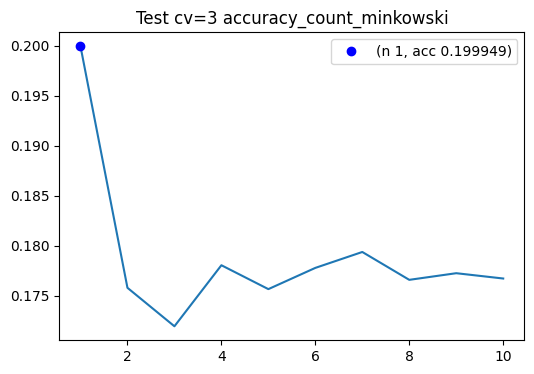

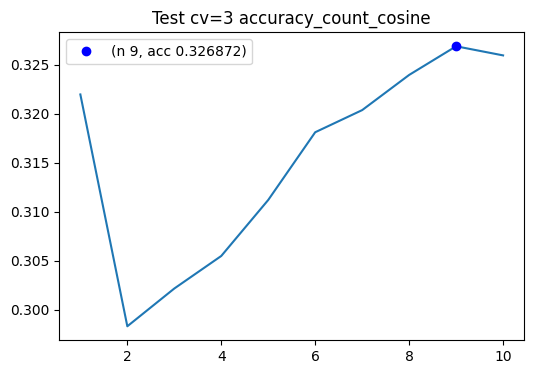

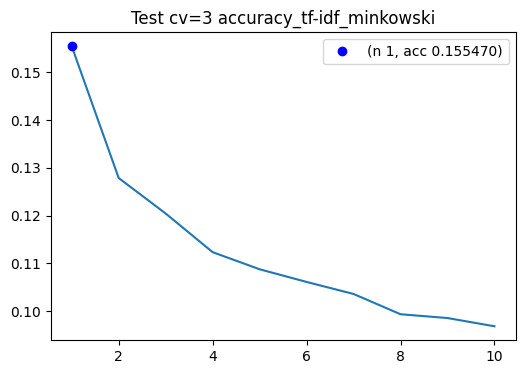

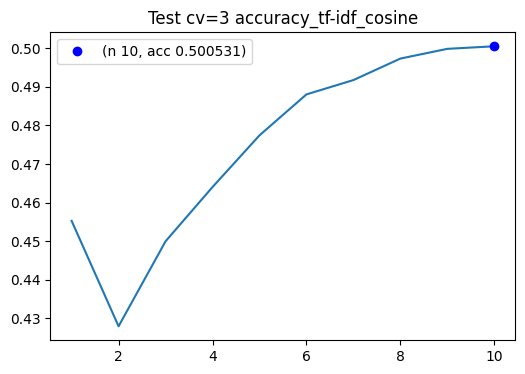

In [ ]:
plot_history(history)

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [ ]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

In [ ]:
X_test = newsgroups['data']
y_test = newsgroups['target']

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [ ]:
best_model = MyKNeighborsClassifier(n_neighbors=9, metric='cosine', algorithm='brute')
vectorizer = TfidfVectorizer(min_df=50, max_df=0.5)
transformed_X_train, transformed_y_train = vectorizer.fit_transform(X_train), y_train

best_model.fit(transformed_X_train.toarray(), transformed_y_train)

transformed_X_test = vectorizer.transform(X_test)
y_pred = best_model.predict(transformed_X_test.toarray())

# Качество значимо лучше, т.к учимся на всех данных, а не на двух фолдах
print(accuracy_score(y_test, y_pred))

0.6383430695698353


# Линейные модели (5 баллов)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

### Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической:
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно.

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается.
* Правило останова - максимальное количество эпох
    

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array.





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены.

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***.

Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [ ]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """

    indexes = np.arange(X.shape[0])
    if shuffle:
        indexes = np.random.permutation(indexes)

    # We are do not taking last batch if it's length less then batch_size
    # because it can be too much noisy
    for batch_start in range(0, len(indexes) // batch_size, batch_size):
        yield X[batch_start: batch_start + batch_size], y[batch_start: batch_start + batch_size]

def create_batch_generator_wrapper(batch_size):
    return partial(batch_generator, batch_size=batch_size)

In [ ]:
#Теперь можно сделать генератор по данным ()
# my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1)

In [ ]:
#%%pycodestyle

def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """

    sigm_value_x = 1 / (1 + np.exp(-x))
    return sigm_value_x


from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg'):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """

        assert model_type in ['lin_reg', 'log_reg']
        self.C = C
        self.eps = 1e-6
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}
        self.model_type = model_type

    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        n_samples = X.shape[0]
        output = self.calculate_model_output(X_batch)

        reg_loss = 0.0
        if self.C != 0:
            reg_loss = 1./self.C * np.sum(self.weights[1:] ** 2)

        if self.model_type == 'lin_reg':
            loss = np.mean((output - y_batch) ** 2)
        elif self.model_type == 'log_reg':
            loss = -np.mean(y_batch * np.log(np.clip(output, self.eps, 1.0)) +
                     (1 - y_batch) * np.log(np.clip(1 - output, self.eps, 1.0)))
        loss += reg_loss

        return loss

    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        output = self.calculate_model_output(X_batch)

        reg_grad = 0.0
        if self.C != 0:
            reg_grad = np.hstack([[0], 2 * 1./self.C * self.weights[1:]])

        loss_grad = X_batch.T @ (output - y_batch)
        if self.model_type == 'lin_reg':
            loss_grad *= 2

        loss_grad += reg_grad

        return loss_grad

    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights -= self.alpha * new_grad

    def pad_fake_bias_feature(self, X):
        return np.hstack([np.ones((X.shape[0], 1)), X])

    def calculate_model_output(self, X):
        output = X @ self.weights
        if self.model_type == 'log_reg':
            output = sigmoid(output)
        return output

    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        X_padded = self.pad_fake_bias_feature(X)
        n_samples = X_padded.shape[0]
        n_features = X_padded.shape[1]

        # Нужно инициализровать случайно веса
        self.weights = np.random.normal(0, math.sqrt(2/(n_features + 1)), (n_features))
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X_padded, y, shuffle=True)
            for batch_num, (X_batch, y_batch) in enumerate(new_epoch_generator):
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после

        return self

    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        X_padded = self.pad_fake_bias_feature(X)
        y_hat = self.calculate_model_output(X_padded)

        return y_hat

Запустите обе регрессии на синтетических данных.


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [ ]:
def plot_decision_boundary(clf):
    b0, w1, w2 = clf.weights
    x = np.arange(-3, 3, 0.1)
    # y = np.array([w1 * x_el + b0 for x_el in x])
    # plt.plot(x, y, label='1')
    # y = np.array([w1/w2 * x_el + b0/w2 for x_el in x])
    # plt.plot(x, y, label='2')
    y = np.array([-w1/w2 * x_el - b0/w2 for x_el in x])
    plt.plot(x, y, label='3')
    plt.legend()
    pass

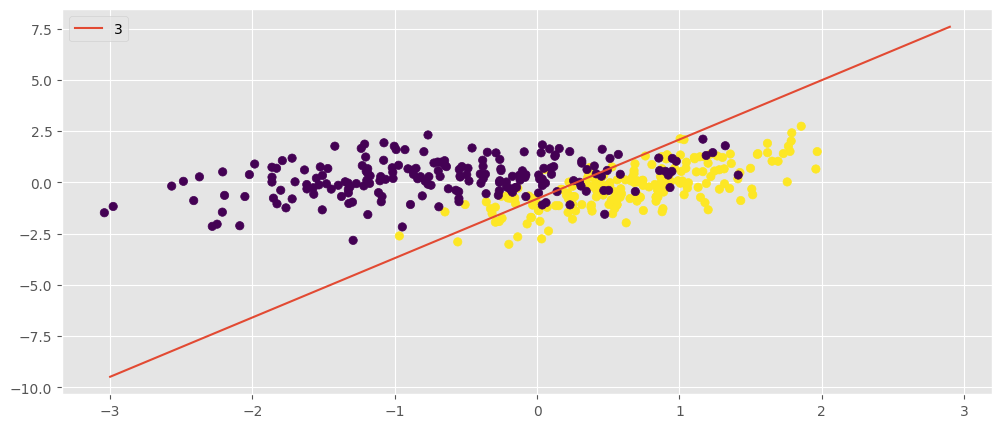

acc =  0.8725


In [ ]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

X_norm = (X - X.mean(axis=0)) / X.std(axis=0)
cls = MySGDClassifier(batch_generator, C=1, alpha=1e-3, max_epoch=50, model_type='log_reg')
cls.fit(X_norm, y)

plot_decision_boundary(cls)

plt.scatter(X_norm[:,0], X_norm[:,1], c=y)
plt.show()
print("acc = ", accuracy_score(y, cls.predict(X_norm) > 0.5))

Далее будем анализировать Ваш алгоритм.
Для этих заданий используйте датасет ниже.

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100000, n_features=10,
                           n_informative=4, n_redundant=0,
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике.

$N$ можно брать 10, 50, 100 и т.д.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# X_norm = (X - X.mean(axis=0)) / X.std(axis=0)
X_norm = X

lr 0.000100, acc 0.923360
lr 0.001000, acc 0.977610
lr 0.010000, acc 0.985190
lr 0.100000, acc 0.980000


<ipython-input-97-3c6f944271cc>:9: RuntimeWarning: overflow encountered in exp
  sigm_value_x = 1 / (1 + np.exp(-x))


lr 1.000000, acc 0.977710


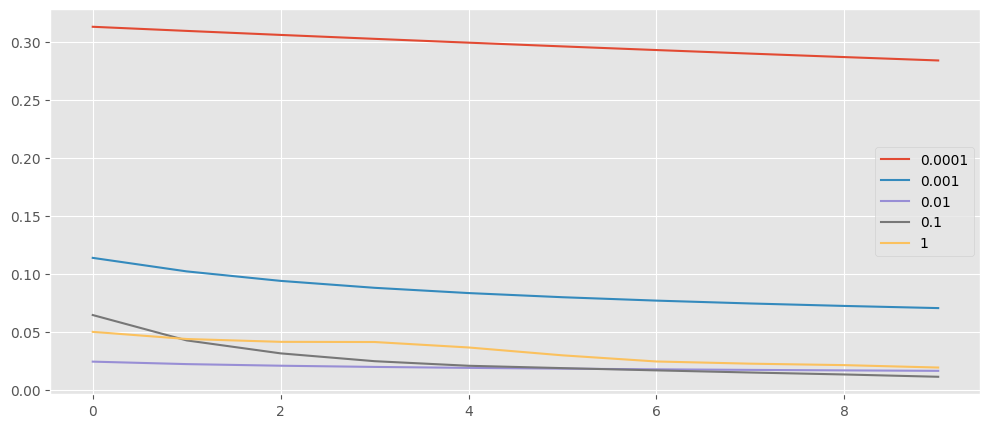

In [ ]:
history = {}
N = 10

for alpha in [1e-4, 1e-3, 1e-2, 1e-1, 1]:
    my_cls = MySGDClassifier(create_batch_generator_wrapper(batch_size=400), C=0.0, alpha=alpha, max_epoch=100, model_type='log_reg')
    my_cls.fit(X_norm, y)
    history[alpha] = np.mean(np.array(my_cls.errors_log['loss']).reshape(-1, N), axis=0)
    print("lr %f, acc %f" % (alpha, accuracy_score(y, my_cls.predict(X_norm) > 0.5)))
    # break

for alpha, hist in history.items():
    plt.plot(hist, label=str(alpha))

plt.legend()
plt.show()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)`

Можно сказать, что при слишком маленьком значении `alpha` алгоритм просто не сможет сойтись

C 100.000000, acc 0.974110
C 35.938137, acc 0.972970
C 12.915497, acc 0.970150
C 4.641589, acc 0.967790
C 1.668101, acc 0.972210
C 0.599484, acc 0.976060
C 0.215443, acc 0.981180
C 0.077426, acc 0.979370
C 0.027826, acc 0.965310
C 0.010000, acc 0.066680


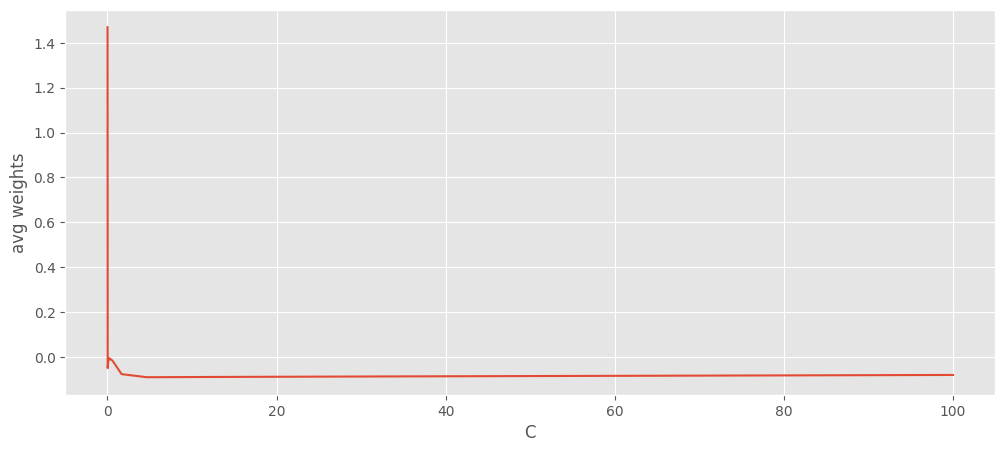

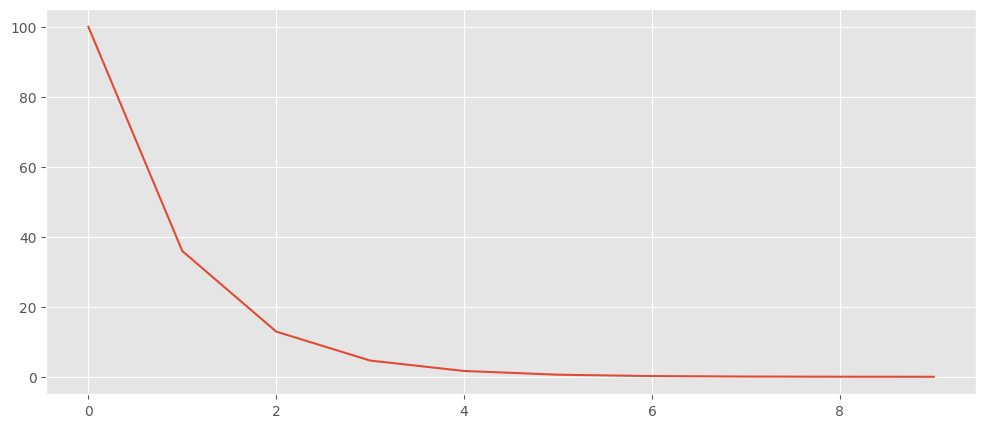

In [ ]:
history = {}
N = 10


# with np.lospace(3, -3, 10) plot does not informative as it is not calibrated
for C in np.logspace(2, -2, 10):
    my_cls = MySGDClassifier(create_batch_generator_wrapper(batch_size=400), C=C, alpha=1e-2, max_epoch=10, model_type='log_reg')
    my_cls.fit(X_norm, y)
    history[C] = np.mean(my_cls.weights)
    print("C %f, acc %f" % (C, accuracy_score(y, my_cls.predict(X_norm) > 0.5)))


plt.xlabel("C")
plt.ylabel("avg weights")
plt.plot(history.keys(), history.values())
plt.show()

plt.plot(np.logspace(2, -2, 10))
plt.show()

Довольны ли Вы, насколько сильно уменьшились Ваши веса?

Достаточно